In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *


In [2]:
files = ["23", "42.1", "61", "80"]

data = []

for file in files:
    data_table = pd.read_csv("measures/" + file + ".csv").to_numpy()
    U = data_table[:, 0]
    I = data_table[:, 1]

    data.append([])

    data[-1].append(U)
    data[-1].append(I)
    data[-1].append([])
    data[-1].append([])

    for i in range(len(U)):
        data[-1][2].append(U[i] / I[i])
        data[-1][3].append(U[i] * I[i])

    tex_table = [[r"$U, мВ$", r"$I, мА$", r"$R_н, Ом$", r"$Q, мВт$"]]

    for i in range(len(U)):
        tex_table.append(["%.0f" % (U[i] * 1000), "%.1f" % (I[i] * 1000), "%.1f" % (U[i] / I[i]), "%.1f" % (U[i] * I[i] * 1000)])

    texTable(tex_table)







\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

        $U, мВ$ & $I, мА$ & $R_н, Ом$ & $Q, мВт$\\ \hline
        2910 & 128.0 & 22.7 & 372.5\\ \hline
        2765 & 122.5 & 22.6 & 338.7\\ \hline
        2598 & 116.1 & 22.4 & 301.6\\ \hline
        2432 & 109.6 & 22.2 & 266.5\\ \hline
        2250 & 102.2 & 22.0 & 229.9\\ \hline
        2052 & 94.1 & 21.8 & 193.1\\ \hline
        1839 & 85.0 & 21.6 & 156.3\\ \hline
        1589 & 74.2 & 21.4 & 117.9\\ \hline
        1300 & 61.3 & 21.2 & 79.7\\ \hline
        920 & 43.7 & 21.1 & 40.2\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

        $U, мВ$ & $I, мА$ & $R_н, Ом$ & $Q, мВт$\\ \hline
        3000 & 125.1 & 24.0 & 375.3\\ \hline
        2835 & 119.1 & 23.8 & 337.6\\ \hline
        2678 & 113.3 & 23.6 & 303.4\\ \hline
        2504 & 106.7 & 23.5 & 267.2\\ \hline
        2322 & 99.7 & 23.3 & 231.5\\

k: (0.0051506637435880165 +- 4.372785447033112e-05)
b: (20.82068001585685 +- 0.010273336060609312)
k: (0.004866436472199103 +- 1.9404402571770362e-05)
b: (22.15994141825529 +- 0.00457627114443818)
k: (0.004663842507733094 +- 4.7498973228864006e-05)
b: (23.508040900096674 +- 0.010070531691990446)
k: (0.004678839299736428 +- 3.632661209145976e-05)
b: (24.791570752809246 +- 0.0074357710289653855)


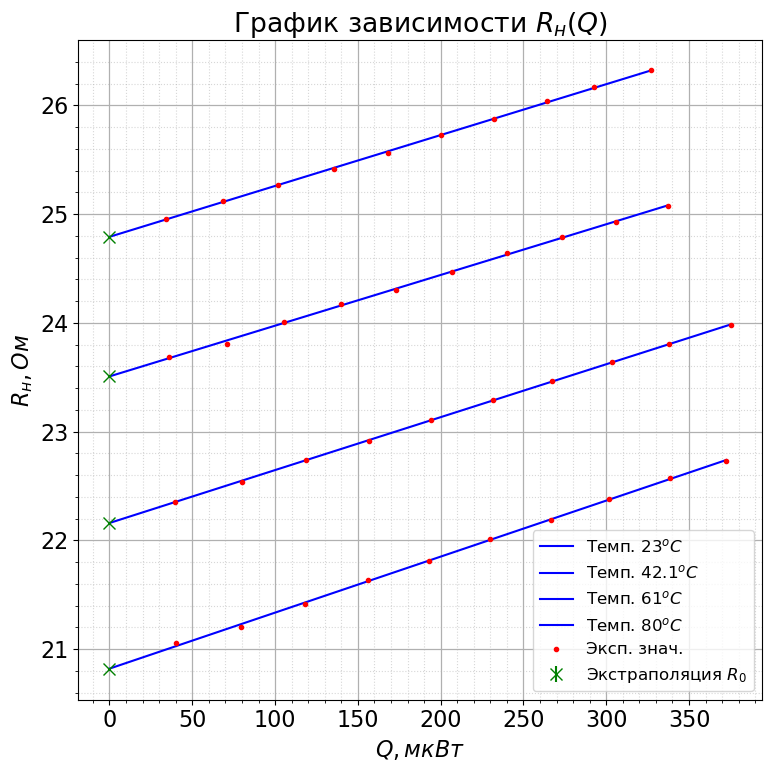

In [3]:

def make_mnk_custom(i, title, x, y):

    def func(x, k, b):
        return x * k + b

    popt, pcov = curve_fit(func, x, y, p0 = (0.0, 0.0))
    k, b = popt
    dk, db = np.sqrt(np.diag(pcov))

    print("k: ({} +- {})".format(k, dk))
    print("b: ({} +- {})".format(b, db))

    #plt.errorbar(x, y, "or", markersize = 9, label = 'Экспериментальные значения')
    plt.errorbar(x, y, fmt = '.r', label = "Эксп. знач." if i == 0 else "")
    #plt.plot(x, y, "+b", label = "Экспериментальные данные", linewidth = 1)
    plt.errorbar(0, b, yerr = db, fmt = 'xg', label = r"Экстраполяция $R_0$" if i == 0 else "", markersize = 9)

    x_lin = np.linspace(x[0], 0, 1000)
    plt.plot(x_lin, func(x_lin, k, b), "b", label = title)

    return [k, dk], [b, db]

data_dRdQ = []
data_R0 = []

mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title("График зависимости $R_н(Q)$")
plt.ylabel("$R_н, Ом$")
plt.xlabel("$Q, мкВт$")

for i in range(len(files)):

    x = [j * 1000 for j in data[i][3]]
    y = data[i][2]

    k, b = make_mnk_custom(i, r"Темп. $" + files[i] + r"^oC$", x, y)

    data_dRdQ.append(k)
    data_R0.append(b)

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

plt.savefig("pictures/raw.png")
plt.show()


In [4]:
coeffs_table = [[r"$t, ^oC$", "$k$", "$b$"]]

for i in range(len(files)):
    coeffs_table.append(["$" + files[i] + "$", texAns([data_dRdQ[i][0] * 1000, data_dRdQ[i][1] * 1000], 2), texAns(data_R0[i], 3)])

texTable(coeffs_table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $t, ^oC$ & $k$ & $b$\\ \hline
        $23$ & $(5.15 \pm 0.04)$ & $(20.821 \pm 0.010)$\\ \hline
        $42.1$ & $(4.87 \pm 0.02)$ & $(22.160 \pm 0.005)$\\ \hline
        $61$ & $(4.66 \pm 0.05)$ & $(23.508 \pm 0.010)$\\ \hline
        $80$ & $(4.68 \pm 0.04)$ & $(24.792 \pm 0.007)$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



k: (0.0698301789177755 +- 0.0005368306427489301)
b: (19.222058304730787 +- 0.02991646218721557)


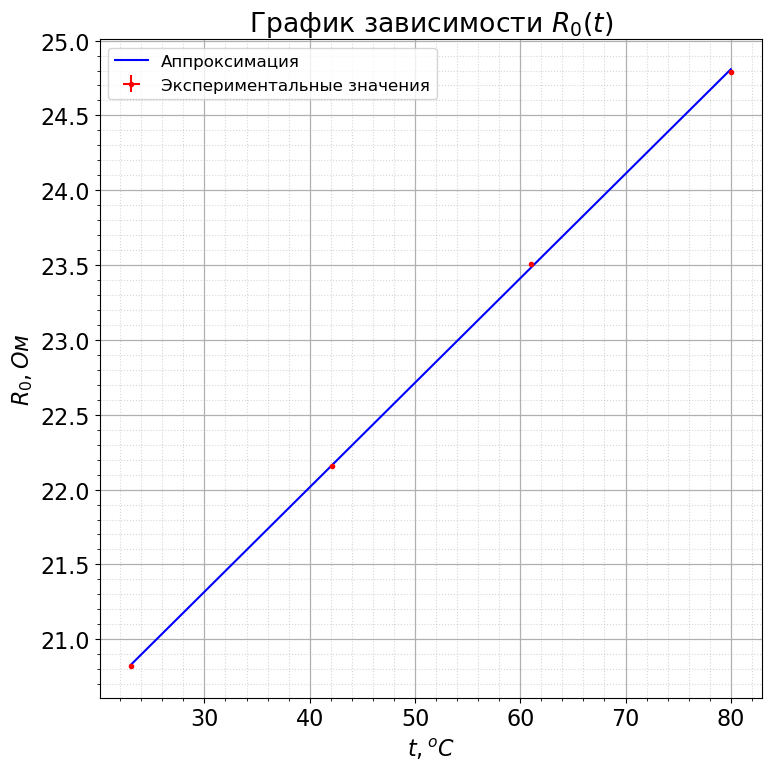

$(0.0698 \pm 0.0006)$


In [5]:
x = [i for i in [23, 42.1, 61, 80]]
y = [i[0] for i in data_R0]
dy = [i[1] for i in data_R0]

dRdt, bdRdt = make_mnk("pictures/R0T.png", r"График зависимости $R_0(t)$", "$t, ^oC$", "$R_0, Ом$", x, y, 0.1, dy)

alpha = [dRdt[0], 0]
alpha[1] = np.sqrt(dRdt[1]**2 + alpha[0]**2 * ((0.1 / np.mean([23, 42.1, 61, 80]))**2 + (np.mean([i[1] for i in data_R0]) / np.mean([i[0] for i in data_R0]))**2))

print(texAns(alpha, 4))

In [16]:
L = [0.4, 0.002]
lnr0r1 = [5, 1]

data_k = []

for i in range(len(data_dRdQ)):
    data_k.append([alpha[0] / data_dRdQ[i][0] / (2 * 3.1417 * L[0] / lnr0r1[0]), 0])
    data_k[-1][1] = data_k[-1][0] * np.sqrt((L[1] / L[0])**2 + (alpha[1] / alpha[0])**2 + (data_dRdQ[i][1] / data_dRdQ[i][0])**2)

k_table = [[r"$t, ^oC$", r"$k, 10^{-3}\frac{Вт}{м * с}$"]]
for i in range(len(files)):
    k_table.append(["$" + files[i] + "$", texAns(data_k[i], 1)])

texTable(k_table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|}
        \hline

        $t, ^oC$ & $k, 10^{-3}\frac{Вт}{м * с}$\\ \hline
        $23$ & $(27.0 \pm 0.3)$\\ \hline
        $42.1$ & $(28.5 \pm 0.3)$\\ \hline
        $61$ & $(29.8 \pm 0.4)$\\ \hline
        $80$ & $(29.7 \pm 0.4)$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



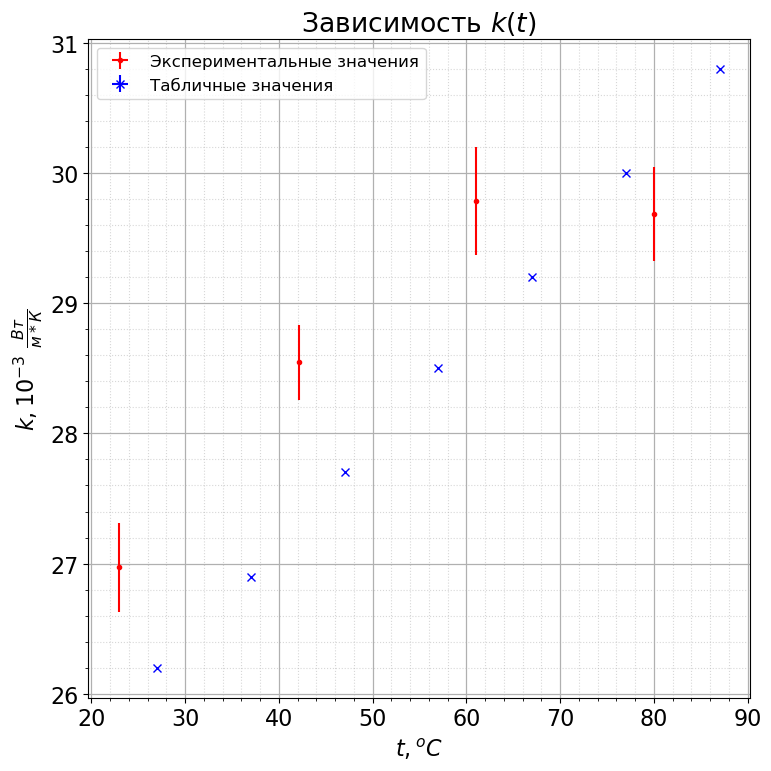

In [24]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title(r"Зависимость $k(t)$")
plt.ylabel(r"$k, 10^{-3}~\frac{Вт}{м*К}$")
plt.xlabel(r"$t, ^oC$")

x = [23, 42.1, 61, 80]
y = [i[0] for i in data_k]
dy = [i[1] for i in data_k]

plt.errorbar(x, y, xerr = [0.1] * len(x), yerr = dy, fmt='.r', label = 'Экспериментальные значения')

x = [i - 273 for i in [300, 310, 320, 330, 340, 350, 360]]
y = [26.2, 26.9, 27.7, 28.5, 29.2, 30.0, 30.8]

plt.errorbar(x, y, xerr = 0, yerr = 0, fmt='xb', label = 'Табличные значения')

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

plt.savefig("pictures/k.png")
plt.show()

k: (0.5695842696821373 +- 0.1555368887049249)
b: (0.06547003615942122 +- 0.8990947531502511)


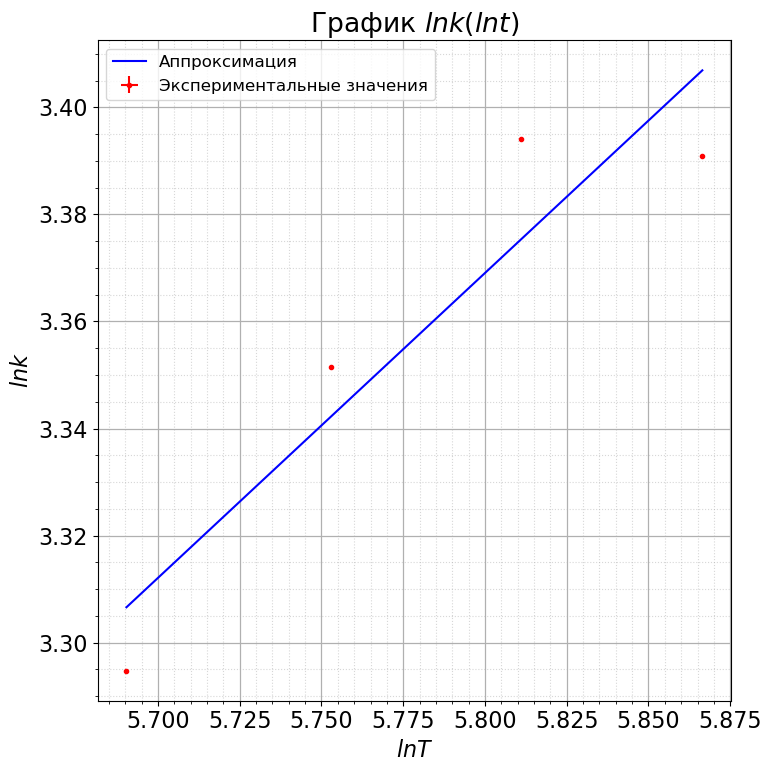

In [26]:
x = [np.log(i + 273) for i in [23, 42.1, 61, 80]]
y = [np.log(i[0]) for i in data_k]

k_r1, b_r1 = make_mnk("pictures/lnk.png", r"График $lnk(lnt)$", "$lnT$", "$lnk$", x, y, 0, 0)
